In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gv_significance import ideal_case, poisson_gaussian
from simulate_detector_efficiency import simulate_detector_efficiency

EXPECTED_SIGNAL = 87.2
EXPECTED_BACKGROUND = 0 + 12.13

ModuleNotFoundError: No module named 'ncephes'

In [45]:
# Ideal case

print("Ideal case for 1 year (no uncertainty on background): σ = " + str(ideal_case.significance(EXPECTED_SIGNAL + EXPECTED_BACKGROUND, EXPECTED_BACKGROUND)))
print("Ideal case for 3 years (no uncertainty on background): σ = " + str(ideal_case.significance(3*(EXPECTED_SIGNAL + EXPECTED_BACKGROUND), 3*EXPECTED_BACKGROUND)))

Ideal case for 1 year (no uncertainty on background): σ = 15.65246505974501
Ideal case for 3 years (no uncertainty on background): σ = 26.99800844041529


In [46]:
# Poisson-gaussian significance

print("Poisson background with 30% systematic error for 1 year: σ = " + str(poisson_gaussian.significance(EXPECTED_SIGNAL + EXPECTED_BACKGROUND, EXPECTED_BACKGROUND, 0.3*EXPECTED_BACKGROUND)))
print("Poisson background with 30% systematic error for 3 years: σ = " + str(poisson_gaussian.significance(3*(EXPECTED_SIGNAL + EXPECTED_BACKGROUND), 3*EXPECTED_BACKGROUND, 3*0.3*EXPECTED_BACKGROUND)))

Poisson background with 30% systematic error for 1 year: σ = 10.861876606615679
Poisson background with 30% systematic error for 3 years: σ = 14.878281539657209


In [47]:
print("Detector efficiency at 5σ for 1 year: " + str(simulate_detector_efficiency(EXPECTED_SIGNAL, EXPECTED_BACKGROUND, 0.3, 5)))
print("Detector efficiency at 5σ for 3 year: " + str(simulate_detector_efficiency(3*EXPECTED_SIGNAL, 3*EXPECTED_BACKGROUND, 0.3, 5)))
print("Detector efficiency at 3σ for 1 year: " + str(simulate_detector_efficiency(EXPECTED_SIGNAL, EXPECTED_BACKGROUND, 0.3, 3)))
print("Detector efficiency at 3σ for 3 year: " + str(simulate_detector_efficiency(3*EXPECTED_SIGNAL, 3*EXPECTED_BACKGROUND, 0.3, 3)))

Detector efficiency at 5σ for 1 year: 1.0
Detector efficiency at 5σ for 3 year: 1.0
Detector efficiency at 3σ for 1 year: 1.0
Detector efficiency at 3σ for 3 year: 1.0


In [48]:
def g_uncertain_threshold(b, sigma, threshold):
    if sigma <= 0:
        return b + 1
            
    i = g_uncertain_threshold(b, sigma - 1, threshold)
    while True:
        if poisson_gaussian.significance(i, b, sigma) >= threshold:
            return i
        i += 1

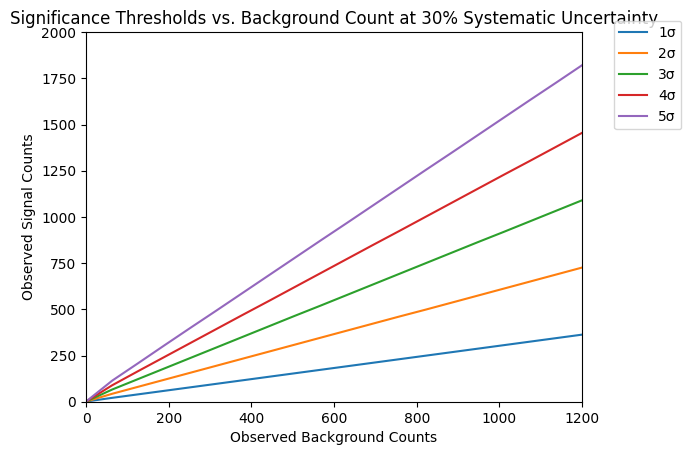

In [49]:
# Number of signal counts required for significance threshold plot at 30% systematic uncertainty

x = np.linspace(0, 1200, 20)

plt.xlim(0, 1200)
plt.ylim(0, 2000)

plt.xlabel('Observed Background Counts')
plt.ylabel('Observed Signal Counts')

plt.title('Significance Thresholds vs. Background Count at 30% Systematic Uncertainty')

for i in range(5):
    plt.plot(x, np.array([g_uncertain_threshold(b, 0.3*b, i + 1) - b for b in x]), label=('%iσ' % (i + 1)))

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

plt.show()

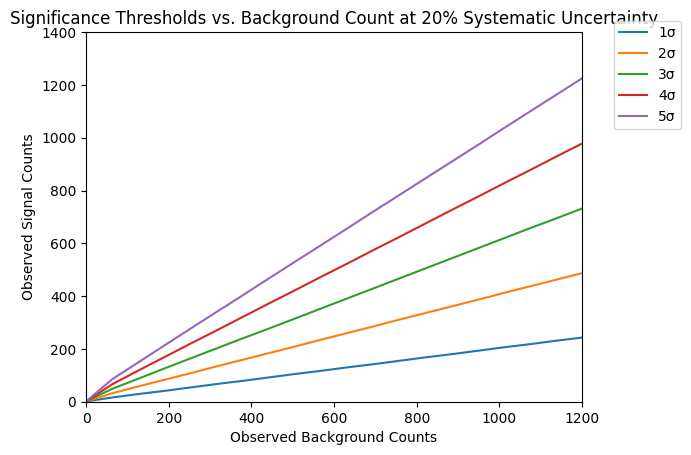

In [50]:
# Number of signal counts required for significance threshold plot at 20% systematic uncertainty

x = np.linspace(0, 1200, 20)

plt.xlim(0, 1200)
plt.ylim(0, 1400)

plt.xlabel('Observed Background Counts')
plt.ylabel('Observed Signal Counts')

plt.title('Significance Thresholds vs. Background Count at 20% Systematic Uncertainty')

for i in range(5):
    plt.plot(x, np.array([g_uncertain_threshold(b, 0.2*b, i + 1) - b for b in x]), label=('%iσ' % (i + 1)))

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

plt.show()

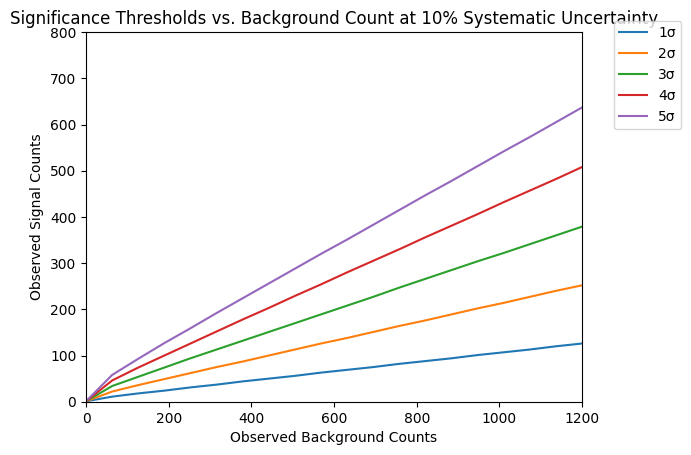

In [51]:
# Number of signal counts required for significance threshold plot at 10% systematic uncertainty

x = np.linspace(0, 1200, 20)

plt.xlim(0, 1200)
plt.ylim(0, 800)

plt.xlabel('Observed Background Counts')
plt.ylabel('Observed Signal Counts')

plt.title('Significance Thresholds vs. Background Count at 10% Systematic Uncertainty')

for i in range(5):
    plt.plot(x, np.array([g_uncertain_threshold(b, 0.1*b, i + 1) - b for b in x]), label=('%iσ' % (i + 1)))

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

plt.show()

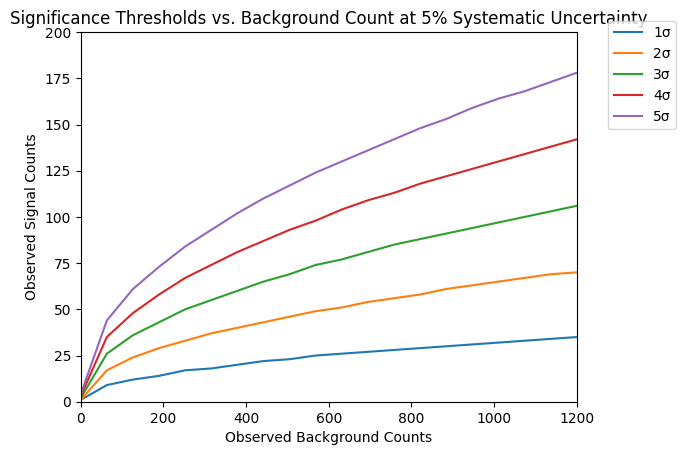

In [52]:
# Number of signal counts required for significance threshold plot at 5% systematic uncertainty

x = np.linspace(0, 1200, 20)

plt.xlim(0, 1200)
plt.ylim(0, 200)

plt.xlabel('Observed Background Counts')
plt.ylabel('Observed Signal Counts')

plt.title('Significance Thresholds vs. Background Count at 5% Systematic Uncertainty')

for i in range(5):
    plt.plot(x, np.array([g_uncertain_threshold(b, 0.05, i + 1) - b for b in x]), label=('%iσ' % (i + 1)))

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

plt.show()

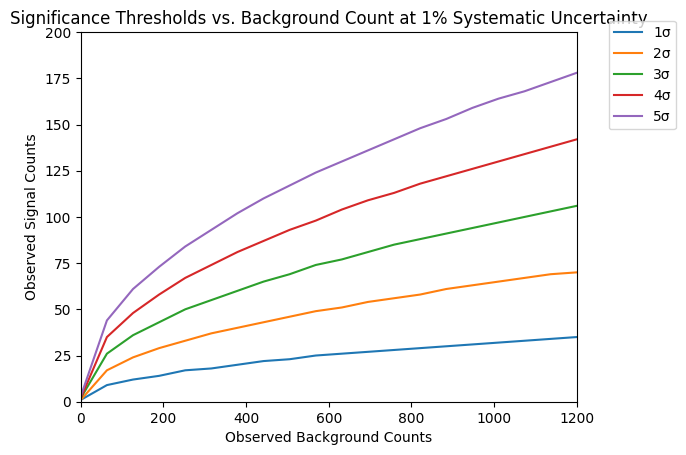

In [53]:
# Number of signal counts required for significance threshold plot at 1% systematic uncertainty

x = np.linspace(0, 1200, 20)

plt.xlim(0, 1200)
plt.ylim(0, 200)

plt.xlabel('Observed Background Counts')
plt.ylabel('Observed Signal Counts')

plt.title('Significance Thresholds vs. Background Count at 1% Systematic Uncertainty')

for i in range(5):
    plt.plot(x, np.array([g_uncertain_threshold(b, 0.01, i + 1) - b for b in x]), label=('%iσ' % (i + 1)))

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

plt.show()

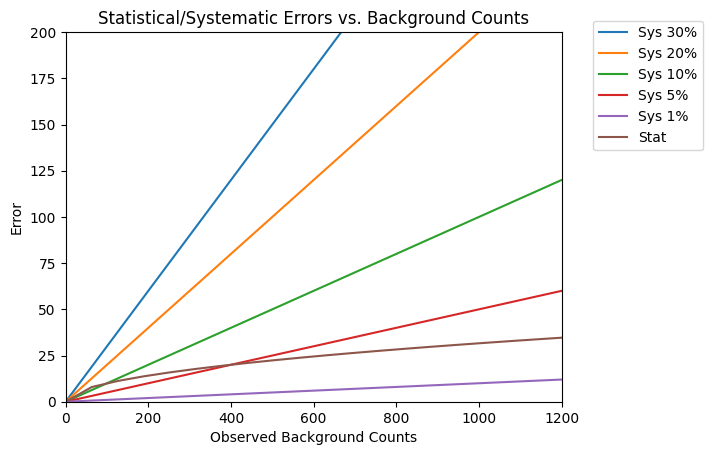

In [54]:
# Statistic and systematic errors

x = np.linspace(0, 1200, 20)

plt.xlim(0, 1200)
plt.ylim(0, 200)

plt.xlabel('Observed Background Counts')
plt.ylabel('Error')

plt.title('Statistical/Systematic Errors vs. Background Counts')


plt.plot(x, 0.3*x, label='Sys 30%')
plt.plot(x, 0.2*x, label='Sys 20%')
plt.plot(x, 0.1*x, label='Sys 10%')
plt.plot(x, 0.05*x, label='Sys 5%')
plt.plot(x, 0.01*x, label='Sys 1%')
plt.plot(x, np.sqrt(x), label='Stat')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

plt.show()

In [55]:
# Read NumPy data
infile_dir = 'graph_data'
data = np.load(infile_dir + '/sensitivity_data.npz')

print("Successfully loaded data!")

Successfully loaded data!


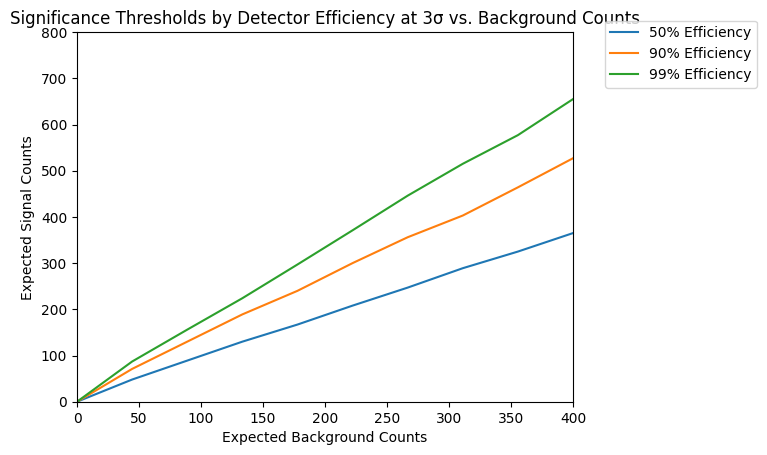

In [56]:
# Statistic and systematic errors

x = np.linspace(0, 400, 10)

plt.xlim(0, 400)
plt.ylim(0, 800)

plt.xlabel('Expected Background Counts')
plt.ylabel('Expected Signal Counts')

plt.title('Significance Thresholds by Detector Efficiency at 3σ vs. Background Counts')

plt.plot(x, data['n3s50e'], label='50% Efficiency')
plt.plot(x, data['n3s90e'], label='90% Efficiency')
plt.plot(x, data['n3s99e'], label='99% Efficiency')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

plt.show()